# Lab2 - Concrete compressive strength regression (35 marks total)
Author: Ameen Yarkhan

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [138]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
    # add function body here
    # scores = cross_validate(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    # return scores['train_score'].mean(), scores['test_score'].mean()
    
    scores = cross_validate(model, X, y, cv=cv, scoring='neg_root_mean_squared_error', return_train_score=True)
    train_score_key = 'train_score'
    test_score_key = 'test_score'
    return scores[train_score_key].mean(), scores[test_score_key].mean()


    

    


    
    

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [139]:
#load the yellowbrick concrete Dataset object and access the README
from yellowbrick import datasets
concrete = datasets.load_concrete(return_dataset=True)
print(concrete.README)



# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

### *Question 1:* What is the target variable name and units in this dataset?

Target variable is : Concrete compressive strength -- quantitative -- units, MPa 



### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [141]:
#Load feature matrix X and target vector y, print shapes

X,y = concrete.to_pandas()
print(X.shape)
print(y.shape)
X.head()


(1030, 8)
(1030,)


,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [142]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [143]:
# print range (minimum and maximum) of features
print("Minimum:")
print(X.min())
print("\nMaximum:")
print(X.max())



Minimum:
cement    102.00
slag        0.00
ash         0.00
water     121.75
splast      0.00
coarse    801.00
fine      594.00
age         1.00
dtype: float64

Maximum:
cement     540.0
slag       359.4
ash        200.1
water      247.0
splast      32.2
coarse    1145.0
fine       992.6
age        365.0
dtype: float64


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

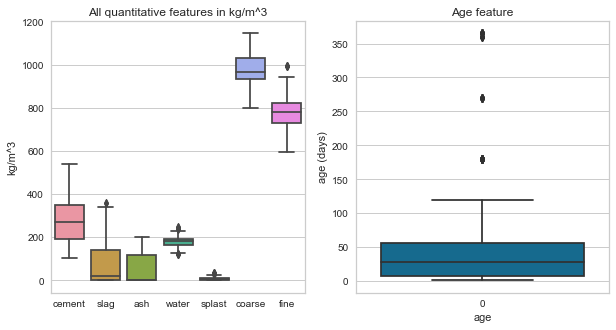

In [144]:
#add two side by side boxplots of features, first one for all but last feature, second one for last feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=X.iloc[:, :-1], ax=ax1)
sns.boxplot(data=X.iloc[:, -1], ax=ax2
              )

#add y axis labels kg/m^3 for left, and age (days) for right and add titles for each
ax1.set_ylabel('kg/m^3')
ax2.set_ylabel('age (days)')
ax1.set_title('All quantitative features in kg/m^3')
ax2.set_title('Age feature')
#add x axis label for age plot 
ax2.set_xlabel('age')
plt.show()





### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

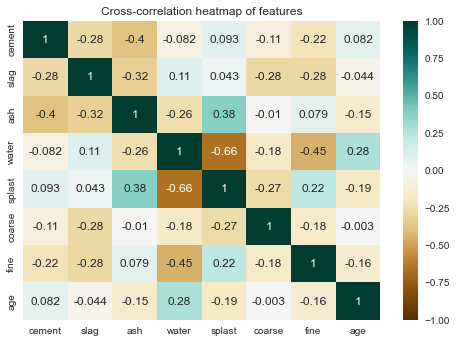

In [213]:
#add pairwise cross-correlation heatmap of features


corr = X.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Cross-correlation heatmap of features')
plt.show()



### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

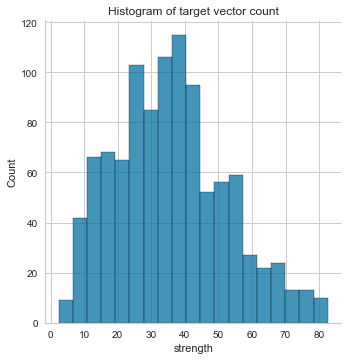

In [146]:


sns.displot(y)
plt.title('Histogram of target vector count')
plt.show()



## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [150]:
#Calling get_regressor_neg_rms() for each model


models = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]
for model in models:
    
    train_score, test_score = get_regressor_neg_rms(model, X_train, y_train)
    print(f'{model.__class__.__name__}:\n\tTraining score: {train_score:.2f}\n\tValidation score: {test_score:.2f}')
    


LinearRegression:
	Training score: -10.29
	Validation score: -10.39
RandomForestRegressor:
	Training score: -2.12
	Validation score: -4.97
GradientBoostingRegressor:
	Training score: -3.69
	Validation score: -4.98


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

*YOUR ANSWER HERE*  


LinearRegression:
	Training score: -10.29
	Validation score: -10.39

    Both scores being very high implies the model may be underfitting the data. This implies low model complexity and high bias.

RandomForestRegressor:
	Training score: -2.12
	Validation score: -4.97

    Training score is much lower than the validation score, which implies the model is overfitting the data. 


GradientBoostingRegressor:
	Training score: -3.69
	Validation score: -4.98

    Training score is much lower than the validation score, which implies the model is overfitting the data.

## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [171]:
#Using nested for loops iterate parameter combinations and print results


print('RandomForestRegressor')
for max_depth in [10, 15, 20]:
    for n_estimators in [100, 200, 400]:
        model = RandomForestRegressor(random_state=64, max_depth=max_depth, n_estimators=n_estimators)
        train_score, test_score = get_regressor_neg_rms(model, X_train, y_train)
        print(f' Max depth {max_depth}, {n_estimators} n estimators\n\tTraining score: {train_score:.2f}\n\tValidation score: {test_score:.2f}')




RandomForestRegressor
 Max depth 10, 100 n estimators
	Training score: -2.44
	Validation score: -5.09
 Max depth 10, 200 n estimators
	Training score: -2.42
	Validation score: -5.06
 Max depth 10, 400 n estimators
	Training score: -2.41
	Validation score: -5.06
 Max depth 15, 100 n estimators
	Training score: -2.12
	Validation score: -4.97
 Max depth 15, 200 n estimators
	Training score: -2.11
	Validation score: -4.93
 Max depth 15, 400 n estimators
	Training score: -2.10
	Validation score: -4.93
 Max depth 20, 100 n estimators
	Training score: -2.12
	Validation score: -4.97
 Max depth 20, 200 n estimators
	Training score: -2.11
	Validation score: -4.93
 Max depth 20, 400 n estimators
	Training score: -2.09
	Validation score: -4.92


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

`The most practical combination of max_depth and n_estimators for the RandomForestRegressor model would be max_depth=15 and n_estimators=200, which has a validation score of -4.93. The results seem to plateu around that mark and dont really improve. `

`However, the best score is where n_estimators=400 and max depth is 20, giving us the lowest validation score of -4.92.`


## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [214]:
#retrain the best estimator



model = RandomForestRegressor(random_state=64, max_depth=20, n_estimators=400)
model.fit(X_train, y_train)
train_score, test_score = get_regressor_neg_rms(model, X_train, y_train)
print(f'Best model:\n\tTraining score: {train_score:.2f}\n\tTest score: {test_score:.2f}')


Best model:
	Training score: -2.09
	Test score: -4.92


## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [215]:
from sklearn.metrics import mean_squared_error, r2_score


In [216]:
# print rms and r-squared for training and test set
#For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

# Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics` to compute the scores



y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Training set:\n\tRMS: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}\n\tR-squared: {r2_score(y_train, y_train_pred):.3f}')

print(f'Test set:\n\tRMS: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}\n\tR-squared: {r2_score(y_test, y_test_pred):.3f}')



Training set:
	RMS: 2.00
	R-squared: 0.986
Test set:
	RMS: 4.80
	R-squared: 0.915


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

`For polynomial regression RMS of 8.82 MPa with R2 = 0.791 for the testing data compared to the R2 of 0.915 and 4.80 MPa that I got, mine outperforms the model.`

`For the neural network RMS of 4.32 MPa and R2 = 0.929 for testing data, compared to 4.80 MPa and R2 = 0.915 for my model, mine does not outperform the model due to the higher RMS.`


### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


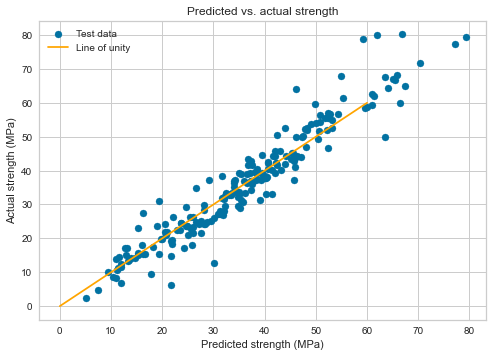

In [217]:
#predicted-actual plot
# Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

# Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

# Add x-axis, y-axis labels including units, and a title.

#add a legend


plt.scatter(y_test_pred, y_test)

plt.plot([0, 60], [0, 60], color='orange')
plt.xlabel('Predicted strength (MPa)')
plt.ylabel('Actual strength (MPa)')
plt.title('Predicted vs. actual strength')
plt.legend(['Test data', 'Line of unity'])
plt.show()



### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



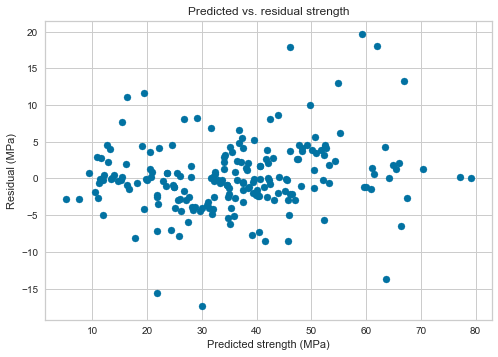

In [218]:
#  Residual plot
# Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

# We look for residuals being distributed equally around the zero horizontal line.

# Add x-axis, y-axis labels including units, and a title.

#add a legend


plt.scatter(y_test_pred, y_test - y_test_pred)


plt.xlabel('Predicted strength (MPa)')
plt.ylabel('Residual (MPa)')
plt.title('Predicted vs. residual strength')
plt.show()




## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
1. Did we find a model that outperforms the neural network reported in the reference article? Explain.
1. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?


*YOUR ANSWER HERE*

`1` 
    Yes, the 4.80 MPa RMS and R2 = 0.915 for of the Random Forest Regressor, with max depth of 20 and 400 n_estimators, outperforms the 8.82 MPa RMS and R2 = 0.791 for the polynomial regression model. The Random Forest model gave a better RMS and R2 score.

`2`
    No, the best result from the Random Forest Regressor gives us 4.80 MPa RMS and R2 = 0.915. Compared to the NNs 4.32 MPa RMS and R2 = 0.929, the Random Forest Regressor does not outperform the NN.
    The NN's RMs is lower than the RFR(Random Forest Regressor) and the R2 is higher than the RFR. While the R2 scores are higher for the NN, the NN's RMS is lower and outperforms the RFR.
    
`3`
    We're assuming that the experiments done to obtain the results were done properly, however if outliers and poor data could negatively impact results. We also assumed the yellowbrick concrete dataset is the same one that is used in the article. Also that 20% of the data is reserved as a test set. A data set from a different source may yield different results. The train/test split may also affect the results. All these assumptions may affect the conclusions.


    

## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*
I liked the assignment and seeing how validating different models can be done. It's interesting to see how there's different and more effective ways to find the strength of concrete just by using different models. 

Also, having to answer questions teaches me what to look for and I have an overall better understanding of the subject matter.Finding the best model was challenging and I had to look things up to know what I was reading. It's motivating to be able to use these techniques in the future!

# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

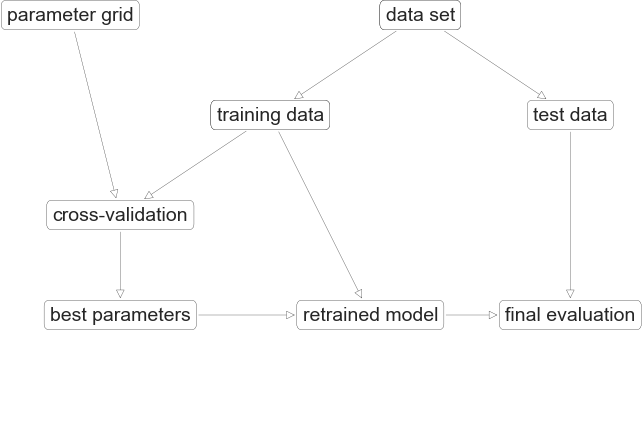

In [157]:
import mglearn

mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [219]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 400], 'max_depth': [ 15, 17, 19, 21], 'max_features': ['auto', 'log2', None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=64), param_grid, cv=7, scoring='neg_root_mean_squared_error')




In [220]:
# TODO: perform the grid search by calling fit()

grid_search.fit(X_train, y_train)





GridSearchCV(cv=7, estimator=RandomForestRegressor(random_state=64),
             param_grid={'max_depth': [15, 17, 19, 21],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_root_mean_squared_error')

In [221]:
# TODO: Print the best parameters

print(f'Best parameters: {grid_search.best_params_}')



Best parameters: {'max_depth': 19, 'max_features': 'log2', 'n_estimators': 400}


In [222]:
# TODO: Print the best score

print(f'Best score: {grid_search.best_score_:.2f}')

Best score: -4.89


### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

<!-- Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]` -->

In [223]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)

param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [ 1, 3, 5, 7],'learning_rate': [0.01, 0.1, 1.0]}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=79), param_grid, cv=7, scoring='neg_root_mean_squared_error')



In [224]:
# TODO: perform the grid search by calling fit()

grid_search.fit(X_train, y_train)



GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=79),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [225]:
# TODO: Print the best parameters

print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [226]:
# TODO: Print the best score

print(f'Best score: {grid_search.best_score_:.2f}')


Best score: -4.21


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*

`Gradient Boosting Regressor producest the better RMSE score of -4.21`

## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [231]:
# retrain the best estimator

model = grid_search.best_estimator_

model.fit(X_train, y_train)







GradientBoostingRegressor(n_estimators=500, random_state=79)

## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [232]:
#TODO: train and test set scores of retrained best model

train_score, test_score = get_regressor_neg_rms(model, X_train, y_train)
print(f'Best model:\n\tTraining score: {train_score:.2f}\n\tTest score: {test_score:.2f}')

#obtain training rms and r-squared

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Training set:\n\tRMS: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}\n\tR-squared: {r2_score(y_train, y_train_pred):.3f}')

#obtain test rms and r-squared

print(f'Test set:\n\tRMS: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}\n\tR-squared: {r2_score(y_test, y_test_pred):.3f}')



Best model:
	Training score: -1.91
	Test score: -4.21
Training set:
	RMS: 2.07
	R-squared: 0.985
Test set:
	RMS: 4.51
	R-squared: 0.926


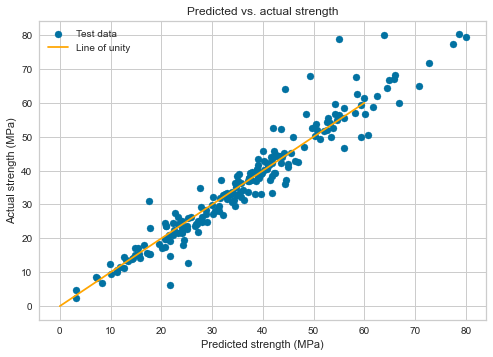

In [233]:
#TODO: predicted-actual plot


plt.scatter(y_test_pred, y_test)

plt.plot([0, 60], [0, 60], color='orange')
plt.xlabel('Predicted strength (MPa)')
plt.ylabel('Actual strength (MPa)')
plt.title('Predicted vs. actual strength')
plt.legend(['Test data', 'Line of unity'])
plt.show()



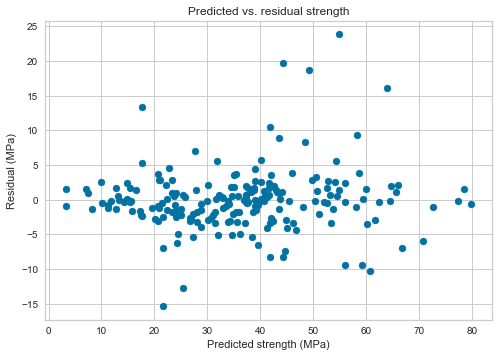

In [234]:
# TODO: Residual plot

plt.scatter(y_test_pred, y_test - y_test_pred)

plt.xlabel('Predicted strength (MPa)')
plt.ylabel('Residual (MPa)')
plt.title('Predicted vs. residual strength')
plt.show()






### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

*YOUR ANSWER HERE*

`This test resulted in 4.51 RMS and 0.926 R2 score. This is better than the polynomial regression reported in the article which had an RMS of 8.82 and R2 of 0.791. However neural network reported results of 4.32MPa  in the article show that we do not outperfom the NN.`

